<a href="https://colab.research.google.com/github/vishalbhsc/Algorithms_diary/blob/master/chessboard_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
# drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab.patches import cv2_imshow
import pandas as pd
import math
import random
from skimage import morphology
from skimage import filters

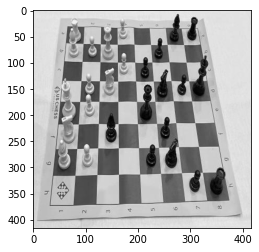

In [3]:
# image= mpimg.imread("/content/gdrive/My Drive/chess_practice_yolo/chess_yolo_v3_pytorch/dataset/train/d3a4e1b8f13ef89f419251f5c5839d0d_jpg.rf.e4b5ce214ea2670fa96ab949aec57dcc.jpg",0)
image=mpimg.imread("/content/gdrive/My Drive/chess_practice_yolo/chess_yolo_v3_pytorch/dataset/train/8de03901c64a80070048ead3fb0d32bd_jpg.rf.a81d5c2674e7d68b2245ef7725a87fac.jpg")
# image=mpimg.imread('/content/b2sl3.png')
img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

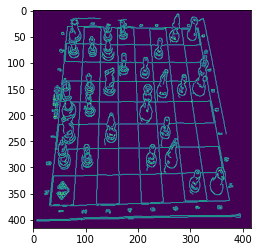

In [4]:
edge=cv2.Canny(img,100,200,apertureSize=3)
plt.imshow(edge)
hough_image=image.copy()
image_fake_1=image.copy()

# New Section

In [5]:
#get first set of lines
bolines = cv2.HoughLines(edge,1,np.pi/180,115)
print(bolines.shape)

for line in bolines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

#     cv2.line(hough_image,(x1,y1),(x2,y2),(0,0,255),2)

# cv2_imshow(hough_image)

(39, 1, 2)


({'0': 1,
  '1': 1,
  '10': 1,
  '11': 1,
  '12': 1,
  '13': 0,
  '14': 0,
  '15': 2,
  '16': 2,
  '17': 2,
  '18': 1,
  '2': 1,
  '3': 1,
  '4': 1,
  '5': 1,
  '6': 1,
  '7': 1,
  '8': 1,
  '9': 1},
 ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'b',
  'b',
  'b',
  'g'])

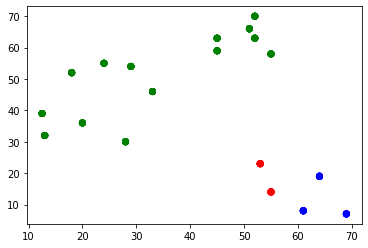

In [6]:
#clustering Algo
def EuclideanDistance(x1, y1,x2,y2): #x2,y2==means    
                                    #euclidean distance between pint1 and point2    
    S = math.sqrt(math.pow(x1-x2, 2)+math.pow(y1-y2, 2)) 
    return S 



def max_min(item):      #to find the max and min value in a list
  items=list(item)
  items.sort()
  return(items[0],items[len(items)-1])


def min_distance_index(gfg_list):
    min_ele=(gfg_list[0])
    posn=0 
    for i in range(1,len(gfg_list)): 
            if gfg_list[i] < min_ele: 
            	min_ele=gfg_list[i]
            	posn=i 
              
    return posn


def initialize_mean(k,cMin,cMax):        #initialize k means between max_c, min_c
    mean= [None]*k
    for i in range (k):
      mean[i]=(random.uniform(cMin+1, cMax-1))
  
    return mean

def update_mean(dict_for_label,list_x,list_y,k):  #function to update mean[i] as the average of the list_x/y
                                                                        # with index k where dictionary with key k is labelled thhe grp no index
  new_centroid_rho_list=[0]*k
  no_of_element_rho=[0]*k
  new_centroid_theta_list=[0]*k
  no_of_element_theta=[0]*k
  for i in range(k):
    for key in dict_for_label:
      if dict_for_label[key]==i:
        new_centroid_rho_list[i] +=list_x[int(key)]
        no_of_element_rho[i]+=1
        new_centroid_theta_list[i] +=list_y[int(key)]
        no_of_element_theta[i]+=1
  for i in range(k):
    if no_of_element_rho[i]==0:
      no_of_element_rho[i]=1
      no_of_element_theta[i]=1
    new_centroid_rho_list[i]=new_centroid_rho_list[i]/no_of_element_rho[i]
    new_centroid_theta_list[i]=new_centroid_theta_list[i]/no_of_element_theta[i]
  return(new_centroid_rho_list,new_centroid_theta_list)


def distance_from_mean(rho_list,theta_list,centroid_rho_list,centroid_theta_list,dict_for_points_label):
	dist=[None]*len(centroid_rho_list)
	for i in range(len(rho_list)):
	      for j in range(len(centroid_rho_list)):
	        dist[j]= EuclideanDistance(rho_list[i],theta_list[i],centroid_rho_list[j],centroid_theta_list[j])
	      # print(dist)
	      grp_no=min_distance_index(dist)
	      # print(grp_no)
	      dict_for_points_label[str(i)]=grp_no

	return(dict_for_points_label)

def visualis_n(dicta):
    dic_col=[None]*len(dicta)
    for key in dicta:
        if dicta[key]==0:
            dic_col[int(key)]='r'
        if dicta[key]==1:
            dic_col[int(key)]='g'
        if dicta[key]==2:
            dic_col[int(key)]='b'   
        # else:
        #   dic_col[int(key)]='b'
    return(dic_col)        


def k_means_cluster(rho_list,theta_list,k,iteration=1000):   #k=20
    min_rho,max_rho=max_min(rho_list)
    min_theta,max_theta=max_min(theta_list)
    centroid_rho_list=initialize_mean(k,min_rho,max_rho)
    centroid_theta_list=initialize_mean(k,min_theta,max_theta)
    dict_for_points_label={}


    for i in range (len(rho_list)):
          dict_for_points_label[str(i)]=0

    for i in range(iteration):
        dict_for_points_label=distance_from_mean(rho_list,theta_list,centroid_rho_list,centroid_theta_list,dict_for_points_label)
        centroid_rho_list,centroid_theta_list =update_mean(dict_for_points_label,rho_list,theta_list,k)
        # print(dict_for_points_label)
        colour=visualis_n(dict_for_points_label)
        plt.scatter(rho_list, theta_list,c=colour)
    return (dict_for_points_label,colour)


rhot_list=(12.5, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 13)
thetat_list=(39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 32)

k_means_cluster(rhot_list,thetat_list,3,10)
 

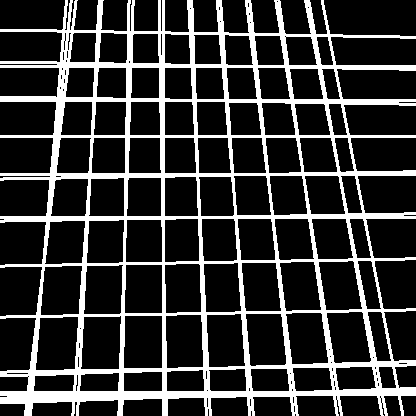

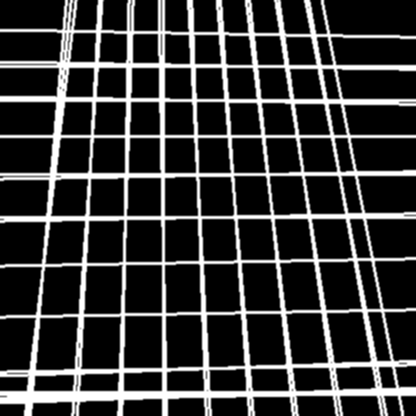

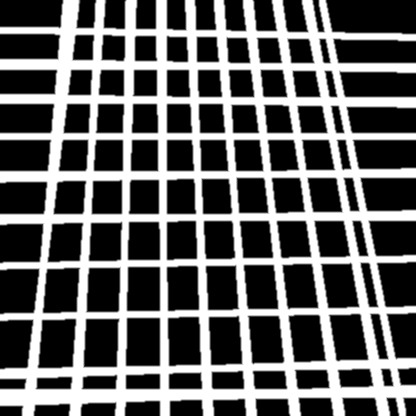

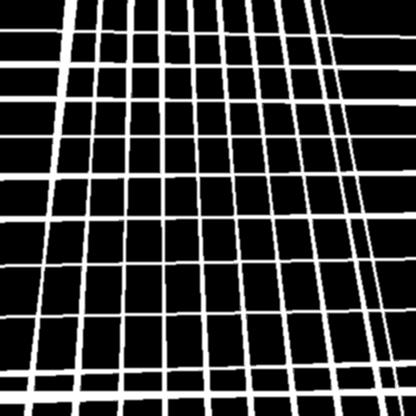

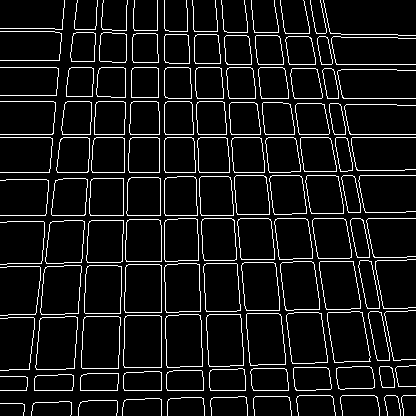

In [7]:
#Filtereing lines 1st layer
line_format_image= np.zeros(shape=img.shape, dtype=np.uint8)
for line in bolines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(line_format_image,(x1,y1),(x2,y2),(255,255,255),2)

cv2_imshow(line_format_image)

gaussian=cv2.GaussianBlur(line_format_image,(3,3),0)
dilate=cv2.dilate(gaussian, kernel=np.ones((5,5),dtype=np.int8), iterations=1)
erode=cv2.erode(dilate, kernel=np.ones((5,5),dtype=np.int8), iterations=1)
canny_1=cv2.Canny(gaussian,100,200)
canny_image_final=cv2.Canny(erode,100,200)
# skeletal= skeletonize(erode)
cv2_imshow(gaussian)
cv2_imshow(dilate)
cv2_imshow(erode)
cv2_imshow(canny_image_final)
# cv2_imshow(canny_1)
# cv2_imshow(skeleton, cmap=plt.cm.gray)


(47, 1, 2)


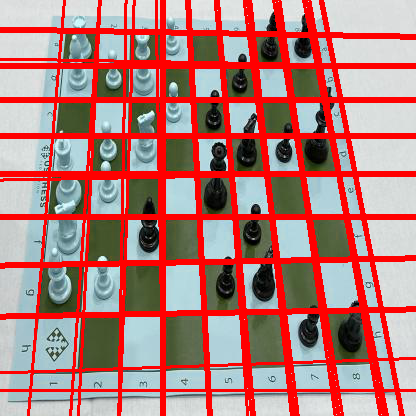

In [8]:
#visualisation after first line
bolines_2 = cv2.HoughLines(canny_image_final,1,np.pi/180,150)
print(bolines_2.shape)

for line in bolines_2:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(hough_image,(x1,y1),(x2,y2),(0,0,255),2)

cv2_imshow(hough_image)


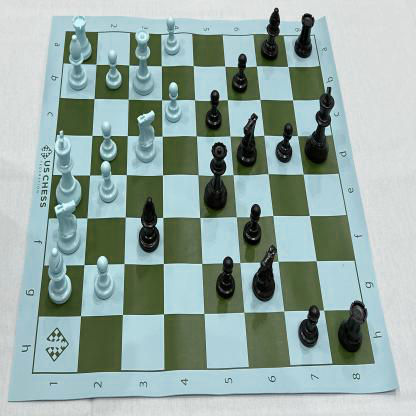

In [9]:
#filtering bolines_2 in vertical and horixzontal lines


#from cluster dictionary to visulazation
def Cluster_2_vis(cluster_dictionary,rho_list,theta_list,cluster_image):
  a=0
  b=0
  for key in cluster_dictionary:
    theta=theta_list[int(key)]
    rho= rho_list[int(key)]
    if (cluster_dictionary[key]==0):   # 0 for horizontal
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      x1 = int(x0 + 1000*(-b))
      y1 = int(y0 + 1000*(a))
      x2 = int(x0 - 1000*(-b))
      y2 = int(y0 - 1000*(a))

      cv2.line(cluster_image,(x1,y1),(x2,y2),(0,255,255),2)

    else:
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      x1 = int(x0 + 1000*(-b))
      y1 = int(y0 + 1000*(a))
      x2 = int(x0 - 1000*(-b))
      y2 = int(y0 - 1000*(a))

      cv2.line(cluster_image,(x1,y1),(x2,y2),(0,0,255),2)
  return(cluster_image)
cv2_imshow(image_fake_1)






# rho_list=[]
# theta_list=[]
# rho_2_list=[]
# for line in bolines_2:
#     rho,theta = line[0]
#     rho_list.append(rho)
#     theta_list.append(theta)
#     rho_2_list.append(0)
# # rho_list=tuple(rho_list)
# # theta_list=tuple(theta_list)
# # rho_2_list=tuple(rho_2_list)
# print(rho_list,theta_list)
# print(len(rho_list))
# # plt.scatter(rho_list,theta_list)
# clustered,colour=k_means_cluster(tuple(rho_2_list),tuple(theta_list),2,100)
# plt.scatter(rho_2_list, theta_list,c=colour)
# print(clustered)

# print(theta_list)
# cv2_imshow(Cluster_2_vis(clustered,rho_list,theta_list,image_fake_1))




In [10]:
#function for finding intersection of lines on image

def polar2cartesian(rho: float, theta_rad: float, rotate90: bool = False):
    """
    Converts line equation from polar to cartesian coordinates

    Args:
        rho: input line rho
        theta_rad: input line theta
        rotate90: output line perpendicular to the input line

    Returns:
        m: slope of the line
           For horizontal line: m = 0
           For vertical line: m = np.nan
        b: intercept when x=0
    """
    x = np.cos(theta_rad) * rho
    y = np.sin(theta_rad) * rho
    m = np.nan
    if not np.isclose(x, 0.0):
        m = y / x
    if rotate90:
        if m is np.nan:
            m = 0.0
        elif np.isclose(m, 0.0):
            m = np.nan
        else:
            m = -1.0 / m
    b = 0.0
    if m is not np.nan:
        b = y - m * x

    return m, b

def intersection(m1, b1, m2, b2):
    # Consider y to be equal and solve for x
    # Solve:
    #   m1 * x + b1 = m2 * x + b2
    x = (b2 - b1) / (m1 - m2)
    # Use the value of x to calculate y
    y = m1 * x + b1

    return (x,y)

def point_on_image(x: int, y: int, image_shape: tuple):
    """
    Returns true is x and y are on the image
    """
    return 0 <= y < image_shape[0] and 0 <= x < image_shape[1]

In [11]:
#a function to compute directly all intersection points from hough lines output array


# def hough_lines_intersection(lines: np.array, image_shape: tuple):
#     """
#     Returns the intersection points that lie on the image
#     for all combinations of the lines
#     """
#     if len(lines.shape) == 3 and \
#             lines.shape[1] == 1 and lines.shape[2] == 2:
#         lines = np.squeeze(lines)
#     lines_count = len(lines)
#     intersect_pts = []
#     for i in range(lines_count - 1):
#         for j in range(i + 1, lines_count):
#             m1, b1 = polar2cartesian(lines[i][0], lines[i][1], True)
#             m2, b2 = polar2cartesian(lines[j][0], lines[j][1], True)
#             x, y = intersection(m1, b1, m2, b2)
#             if point_on_image(x, y, image_shape):
#                 intersect_pts.append([x, y])
#     return np.array(intersect_pts)

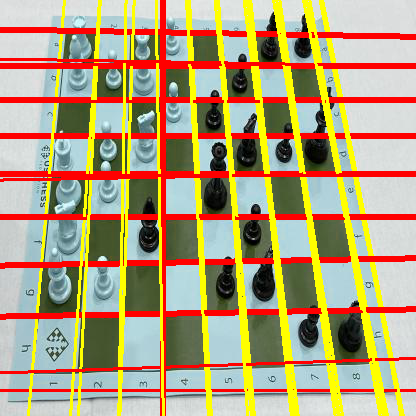

In [12]:
# to filter lines in vertical and horizontal lines



def column_row_filter(hough_line_variable,image_shape):
  rho_list=[]
  theta_list=[]
  intersect_points=[]
  for line in hough_line_variable:
      rho,theta = line[0]
      rho_list.append(rho)
      theta_list.append(theta)
  rho_list=tuple(rho_list)
  theta_list=tuple(theta_list)
  hor_line_no=[]
  for i in range(len(rho_list)):
    m,b = polar2cartesian(rho_list[i], theta_list[i], True)
    x,y= intersection(m,b,0,0)  #with x axis
    if point_on_image(x,y,image_shape):
      intersect_points.append([x,y])
      hor_line_no.append(i)
  return np.array(intersect_points),hor_line_no

def column_row_diction(total_lines_no,hor_line_no):
  ver_hor_line={}
  for i in range(total_lines_no):
    if i in hor_line_no:
      ver_hor_line[str(i)]=0
    else:
      ver_hor_line[str(i)]=1

  return ver_hor_line

###             Testing
kl=column_row_diction(bolines_2.shape[0],column_row_filter(bolines_2,img.shape)[1])
# print (pts_list.shape, pts_list[0])
# print(pts_list.shape)
# print(pts_list,hor_line_no)


# for i in hor_line_no:
#     line=bolines_2[i]
#     rho,theta = line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))

#     cv2.line(image_fake_1,(x1,y1),(x2,y2),(0,0,255),2)

# cv2_imshow(image_fake_1)
###


rho_list1=[]
theta_list1=[]
for line in bolines_2:
      rho,theta = line[0]
      rho_list1.append(rho)
      theta_list1.append(theta)
cv2_imshow(Cluster_2_vis(kl,rho_list1,theta_list1,image_fake_1))


#filter final


In [ ]:
# def final_filter(rho_list,theta_list,diction):
def reduction(values,val_index,delta):   
  #sorting
  for i in range(len(values)): 
      min_idx = i 
      for j in range(i+1, len(values)): 
          if values[min_idx] > values[j]: 
              min_idx = j 
      values[i], values[min_idx] = values[min_idx], values[i] 
      val_index[i] , val_index[min_idx]=val_index[min_idx], val_index[i]
  # reduction and new index
  new_index=[]
  i,j=0,0
  min_idx=values[0]
  new_index[j].append(val_index[i])
  while i<(len(values)-1):    
    if (values[i+1]-values[i])<delta:
      min_idx=(values[i]+values[i+1])/2
      new_index[j].append(val_index[i])
    else:
      j+=1
      new_index[j].append(val_index[i+1])
      min_idx=values[i+1]
    i+=1

  return(new_index)
  
      






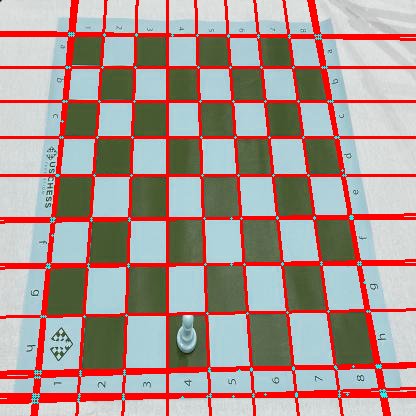

In [ ]:
for i in range (pts_list.shape[0]):
  cv2.circle(image,(int(round(pts_list[i,0])),int(round(pts_list[i,1]))),radius=1,color=(255,255,0),thickness=-1)
cv2_imshow(image)

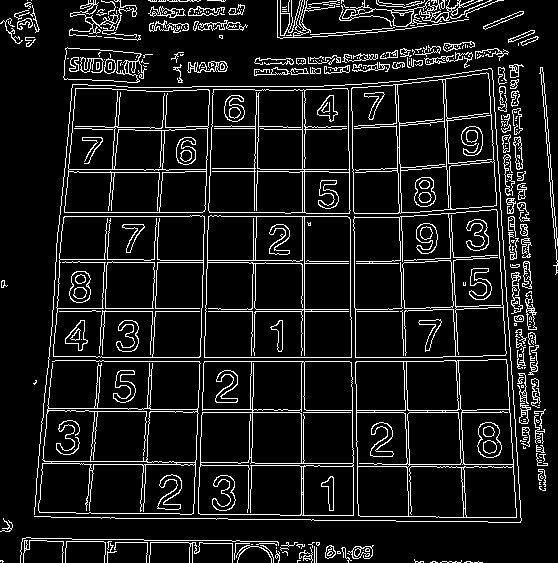

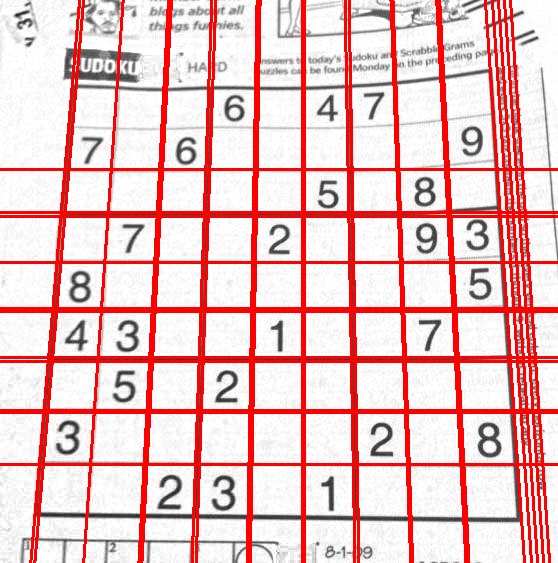

In [ ]:
# img = cv2.imread('/content/b2sl3.png')
# # gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# # edges = cv2.Canny(gray,50,150,apertureSize = 3)
# # minLineLength = 100
# # maxLineGap = 10
# # lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
# # for x1,y1,x2,y2 in lines[0]:
# #     cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray,50,150,apertureSize = 3)
# cv2_imshow(edges)
# lines = cv2.HoughLines(edges,1,np.pi/180,200)
# for line in lines:
#     rho,theta= line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))

#     cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

# cv2_imshow(img)

In [ ]:
test_list = [2, 5, 6, 2, 3, 2] 
  
# printing list 
print("The original list : " + str(test_list)) 
temp = min(test_list) 
res = [i for i, j in enumerate(test_list) if j == temp] 
  
# Printing result 
print("The Positions of minimum element : " + str(res)) 

The original list : [2, 5, 6, 2, 3, 2]


TypeError: ignored